<a href="https://colab.research.google.com/github/shubhamojha123/digital-e-gram-panchayat/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hill and Valley Prediction using Logistic Regression**

#**Objective**

The dataset has 100 features (V1 to V100) and one target variable (Class). It contains numeric values across all features

#**Data source :-**
#**Ybi Github**


# **Import Library**

In [ ]:
#step 1: Import Library
import pandas as pd
import numpy as np
import seaborn as sns

#Import Data

In [ ]:
#step 2:Import Data
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

#Describe Data

In [ ]:
#step 3: Describe Data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


#DATA  Preprocessing

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [ ]:
df.shape

(1212, 101)

In [ ]:
print(df.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']


#Define Target Variable (y) and Feature Variables (X)

In [ ]:
y=df['Class']

In [ ]:
x=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'Class']]

In [ ]:
x.shape

(1212, 101)

In [ ]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1


#Data Visualization

In [ ]:
import matplotlib.pyplot as plt

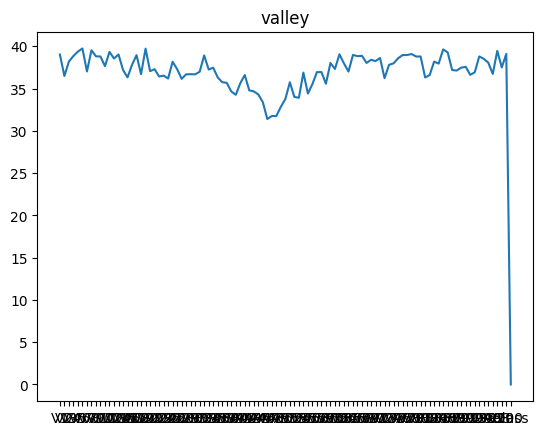

In [ ]:
plt.plot(x.iloc[0,:])
plt.title('valley');

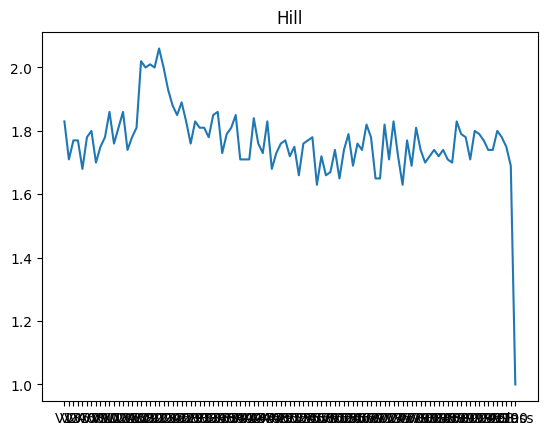

In [ ]:
plt.plot(x.iloc[1,:])
plt.title('Hill');

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((848, 101), (364, 101), (848,), (364,))

#Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=100000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=100000)

In [ ]:
model.intercept_

array([-2.33488314])

In [ ]:
model.coef_

array([[-7.29173600e-01, -5.12825593e-01, -4.73622386e-01,
        -3.51616108e-01, -4.63414785e-01, -2.52024931e-01,
        -3.02199297e-01, -2.54995060e-01, -9.27192011e-04,
         3.91736680e-01,  3.85010870e-01,  1.01809726e-01,
         2.39021758e-01,  1.25942036e-03,  2.34743531e-01,
         8.19898470e-02,  1.55390666e-01,  1.80482166e-01,
         9.71055854e-02,  1.01579626e-01, -5.73348702e-02,
         1.74153472e-01,  2.04582064e-01,  3.66992594e-02,
        -1.71268023e-01,  1.36535621e-01,  1.19338881e-01,
         1.90523630e-01,  5.88564854e-02,  1.28558045e-01,
         6.05717062e-02,  1.58090410e-01, -1.87870743e-01,
         1.64882135e-01,  1.95368307e-01,  1.93103626e-02,
         1.31567019e-01,  6.50520258e-02, -3.02015354e-02,
         5.47016145e-03,  5.39627384e-02,  1.31441611e-02,
        -2.03299035e-02,  1.73073292e-01,  1.64045821e-01,
         1.84599360e-02,  8.98277126e-02,  3.90382755e-02,
         4.13233620e-03, -1.20187583e-02, -5.81193842e-0

#Model Evaluation

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

#Prediction

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[179,   3],
       [  5, 177]])

In [ ]:
accuracy_score(y_test,y_pred)

0.978021978021978

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       182
           1       0.98      0.97      0.98       182

    accuracy                           0.98       364
   macro avg       0.98      0.98      0.98       364
weighted avg       0.98      0.98      0.98       364



#Explaination

The "Hill Valley Dataset" is a collection of topography elevation data that includes elements that characterize different aspects of valley and hill formations. For machine learning tasks like regression or classification, it is frequently utilized. The dataset may have a target variable that indicates the kind or category of the terrain in addition to columns that typically represent various measurements or features of the terrain.

In [ ]:
47